In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/clean/zomato_cleaned.csv")
df.shape


(51269, 13)

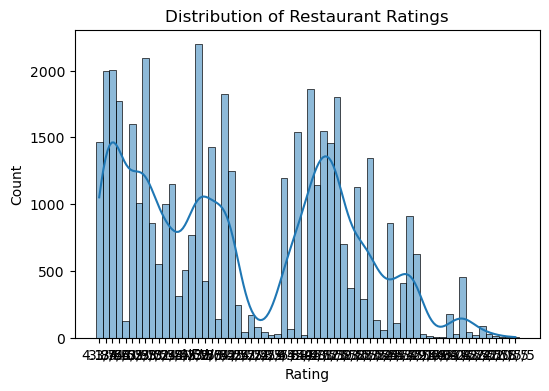

In [5]:
# 1️⃣ Rating Distribution (FOUNDATION INSIGHT)
# Why?

# Shows overall customer sentiment.

plt.figure(figsize=(6,4))
sns.histplot(df['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 📌 Insight to write:

# Most restaurants cluster between 3.5–4.2, indicating competitive rating pressure.

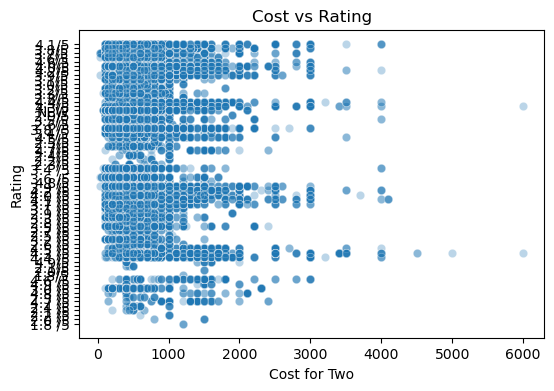

In [6]:
# 2️⃣ Cost vs Rating (MYTH-BUSTER)
# Question:

# Does expensive food mean better ratings?

plt.figure(figsize=(6,4))
sns.scatterplot(
    x='approx_cost(for two people)',
    y='rate',
    data=df,
    alpha=0.3
)
plt.title("Cost vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

# 📌 Insight:

# Higher price does not guarantee higher ratings — quality perception matters more than cost.

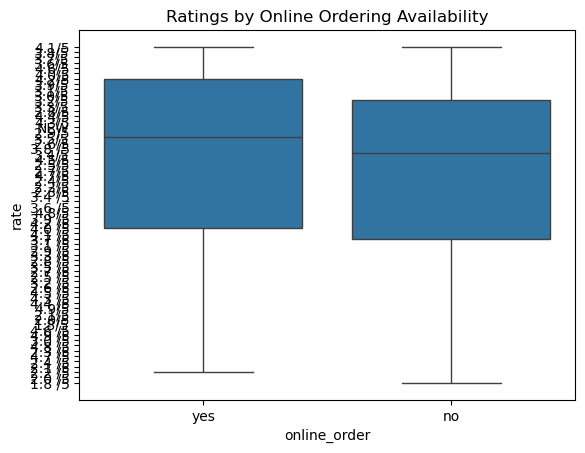

In [2]:
# 3️⃣ Online Order vs Rating (KEY ZOMATO INSIGHT)

sns.boxplot(
    x='online_order',
    y='rate',
    data=df
)
plt.title("Ratings by Online Ordering Availability")
plt.show()

# 📌 Insight:

# Restaurants offering online ordering tend to have slightly higher median ratings.

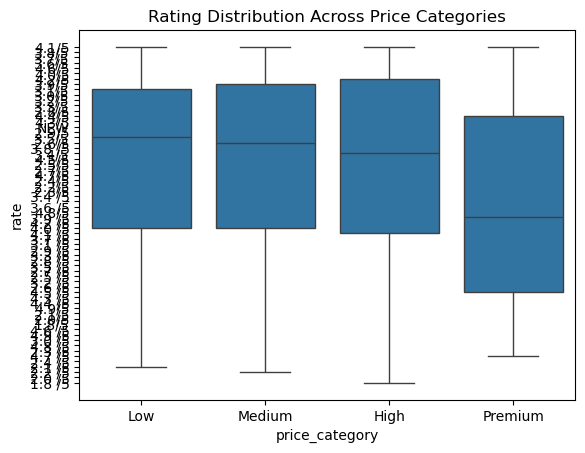

In [4]:
# 4️⃣ Price Category vs Rating (BUSINESS FRIENDLY)

df['price_category'] = pd.cut(
    df['approx_cost(for two people)'],
    bins=[0,300,700,1500,10000],
    labels=['Low','Medium','High','Premium']
)

sns.boxplot(
    x='price_category',
    y='rate',
    data=df
)
plt.title("Rating Distribution Across Price Categories")
plt.show()

# 📌 Insight:

# Medium-priced restaurants often receive the highest ratings, suggesting optimal value-for-money.

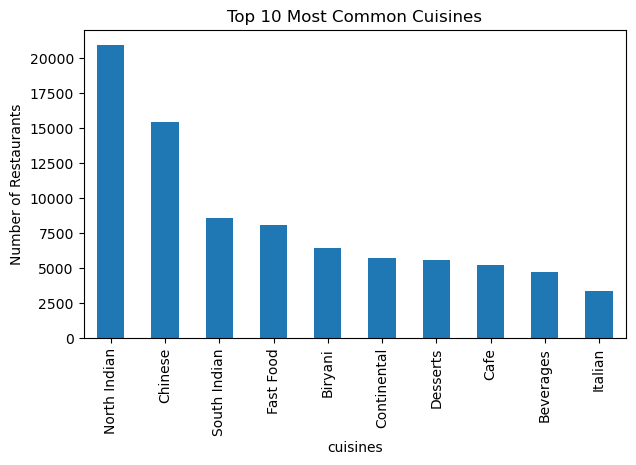

In [9]:
# 5️⃣ Top Cuisines (RECRUITER FAVORITE)

top_cuisines = (
    df['cuisines']
    .str.split(',')
    .explode()
    .str.strip()
    .value_counts()
    .head(10)
)

top_cuisines.plot(kind='bar', figsize=(7,4))
plt.title("Top 10 Most Common Cuisines")
plt.ylabel("Number of Restaurants")
plt.show()

# 📌 Insight:

# North Indian, Chinese, and Fast Food dominate listings, reflecting mass-market demand.


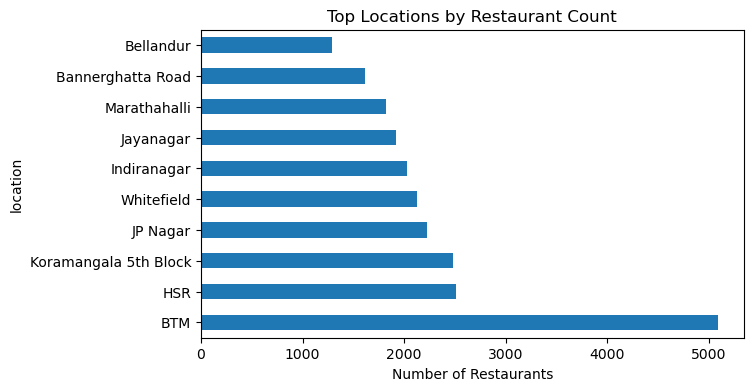

In [7]:
# 6️⃣ Location-wise Restaurant Density

top_locations = df['location'].value_counts().head(10)

top_locations.plot(kind='barh', figsize=(7,4))
plt.title("Top Locations by Restaurant Count")
plt.xlabel("Number of Restaurants")
plt.show()

# 📌 Insight:

# Certain urban hubs have high restaurant density, indicating intense competition.

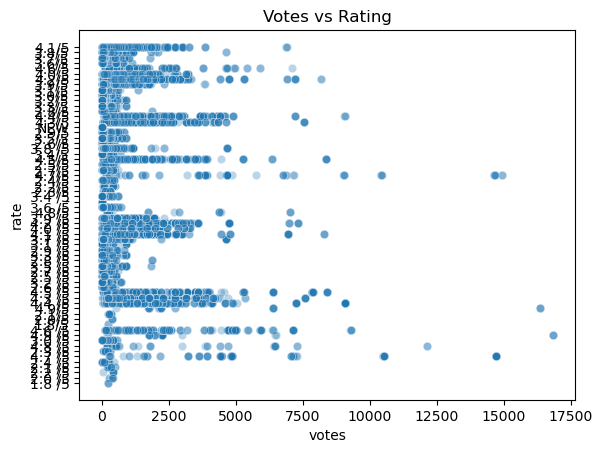

In [8]:
# 7️⃣ Votes vs Rating (ENGAGEMENT SIGNAL)

sns.scatterplot(
    x='votes',
    y='rate',
    data=df,
    alpha=0.3
)
plt.title("Votes vs Rating")
plt.show()

# 📌 Insight:

# Restaurants with higher engagement (votes) tend to have more stable ratings.

### Key Business Insights
1. Most restaurants fall within a narrow rating range (3.5–4.2).
2. Price alone does not drive higher ratings.
3. Online ordering is associated with slightly better ratings.
4. Medium-priced restaurants achieve the best value perception.
5. A few cuisines dominate the market.
6. Restaurant density is concentrated in select locations.

🗣️ INTERVIEW-READY SUMMARY (MEMORIZE)

“EDA revealed that customer satisfaction depends more on service convenience and value-for-money than pricing alone.”